# In Africa, research shows that many people do not have a bank account due to fact that they do not meet certain criteria. This project explores the determining factors or criteria for an individual to own a bank account

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# LOAD DATA

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\Bank account train.csv")
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


##### From the information provided above, the dataset contains no null value

# EXPLORATORY DATA ANALYSIS

In [4]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [5]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [6]:
df.country.value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

Text(0.5, 1.0, 'Value Counts for each Country')

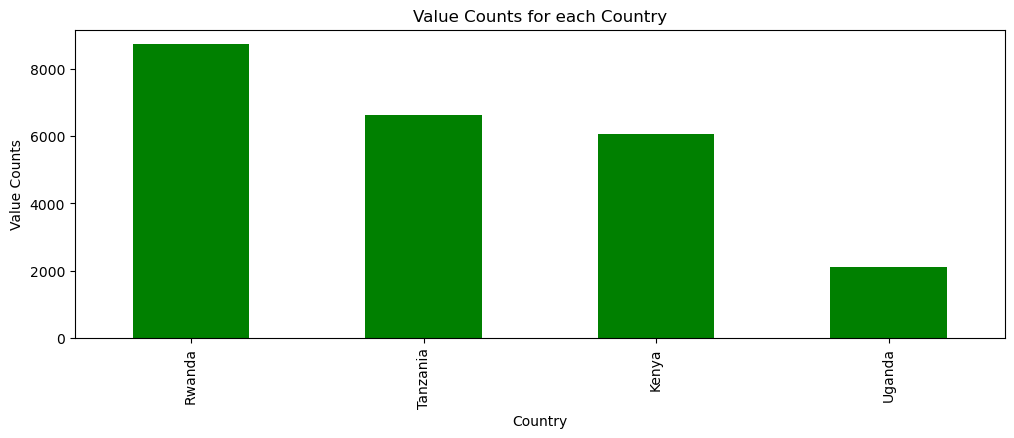

In [7]:
plt.figure(figsize= (12,4))
df.country.value_counts().plot.bar(color = "green")
plt.xlabel("Country")
plt.ylabel("Value Counts")
plt.title("Value Counts for each Country")

In [8]:
df.year.value_counts()

year
2016    8735
2018    8169
2017    6620
Name: count, dtype: int64

In [9]:
df.uniqueid.value_counts()

uniqueid
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: count, Length: 8735, dtype: int64

# From the information from the uniqueid column, the data of the same people was recorded multiple times, so it will be a good idea to drop the column so as prevent our model from learning a wrong pattern

In [10]:
df.bank_account.value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

Text(0.5, 1.0, 'Value Counts for People with Bank Accounts')

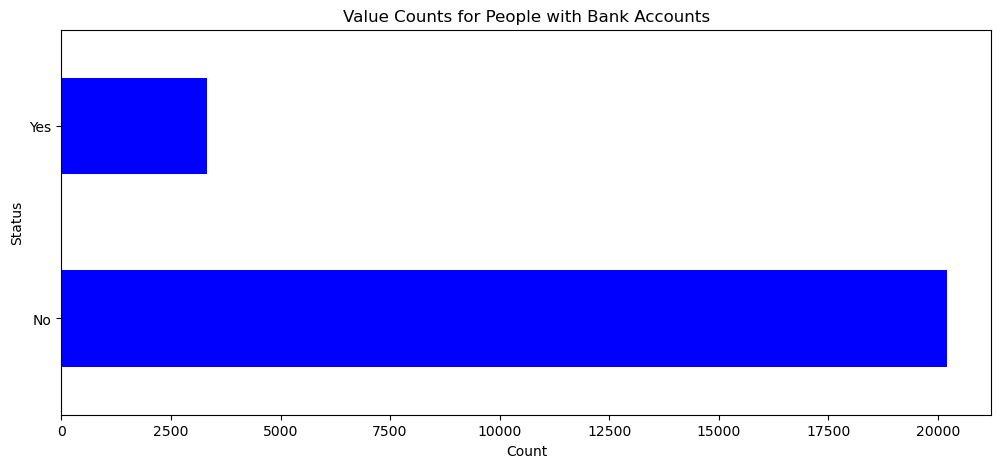

In [11]:
plt.figure(figsize= (12,5))
df.bank_account.value_counts().plot.barh(color = "blue")
plt.xlabel("Count")
plt.ylabel("Status")
plt.title("Value Counts for People with Bank Accounts")

### from the barchart above it can be seen that the population without a bank account is higher than those with an account. 
### It can be seen that a lot of criteria must be met for an individual to have a bank account

In [12]:
df.location_type.value_counts()

location_type
Rural    14343
Urban     9181
Name: count, dtype: int64

Text(0.5, 1.0, 'Population Distribution')

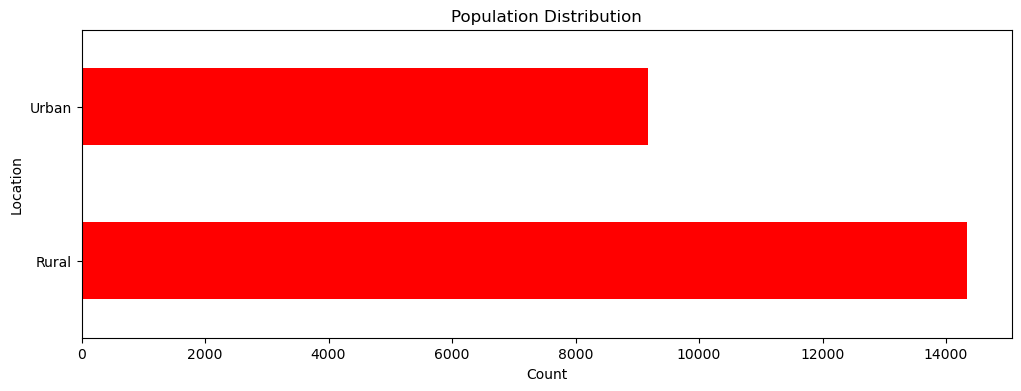

In [13]:
plt.figure(figsize= (12,4))
df.location_type.value_counts().plot.barh(color = "red")
plt.xlabel("Count")
plt.ylabel("Location")
plt.title("Population Distribution")

In [14]:
df.cellphone_access.value_counts()

cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64

Text(0.5, 1.0, 'Population with Access to Cellphone')

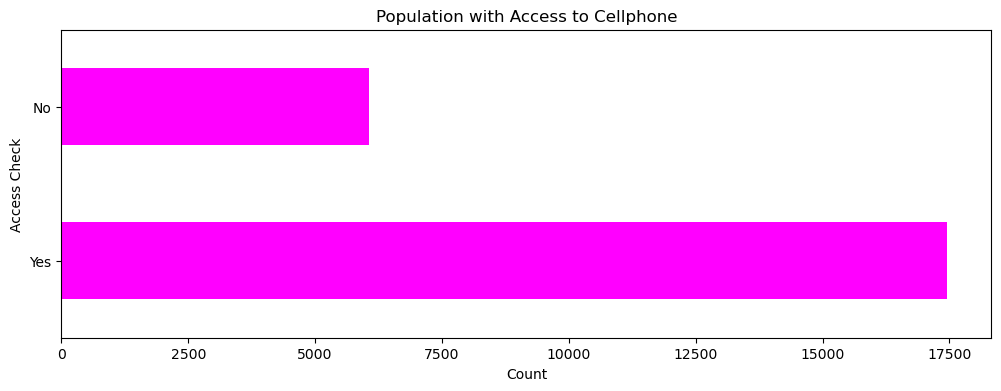

In [15]:
plt.figure(figsize= (12,4))
df.cellphone_access.value_counts().plot.barh(color = "magenta")
plt.xlabel("Count")
plt.ylabel("Access Check")
plt.title("Population with Access to Cellphone")

In [16]:
df.household_size.value_counts()

household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Value Counts for Each Household Size')

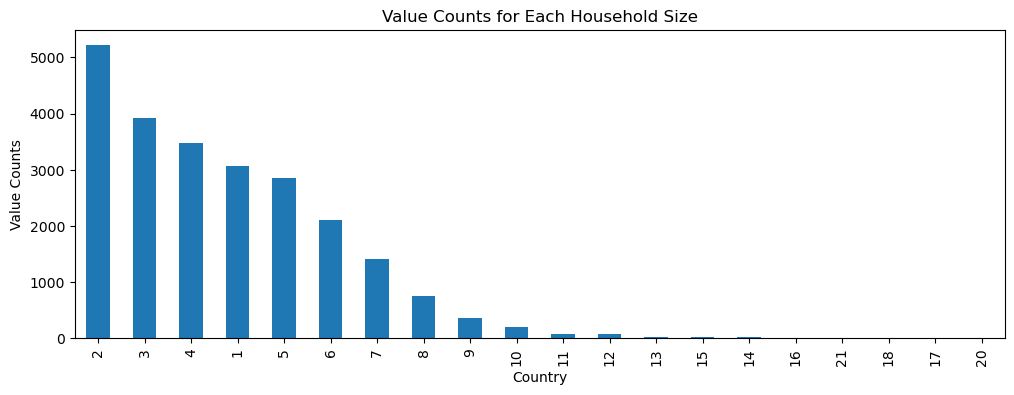

In [17]:
plt.figure(figsize= (12,4))
df.household_size.value_counts().plot.bar()
plt.xlabel("Country")
plt.ylabel("Value Counts")
plt.title("Value Counts for Each Household Size")

In [18]:
df.gender_of_respondent.value_counts()

gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

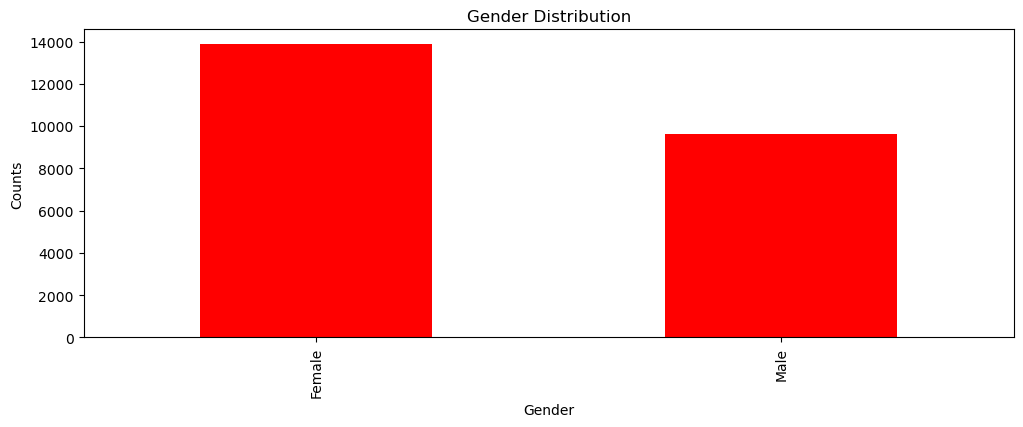

In [19]:
plt.figure(figsize= (12,4))
df.gender_of_respondent.value_counts().plot.bar(color = "red")
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title("Gender Distribution")

In [20]:
df.relationship_with_head.value_counts()

relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64

Text(0.5, 1.0, 'Population Distribution According To Family Relationship')

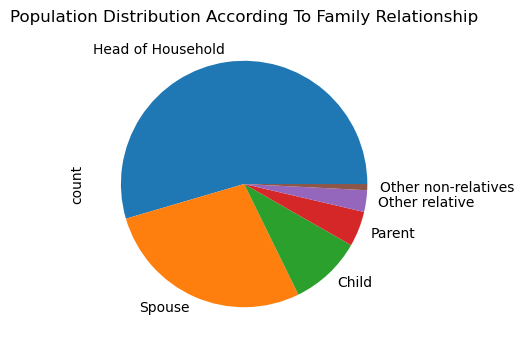

In [21]:
plt.figure(figsize= (15,4))
df.relationship_with_head.value_counts().plot.pie()
plt.title("Population Distribution According To Family Relationship")


In [22]:
df.marital_status.value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

Text(0.5, 1.0, 'Marital Status of the Population')

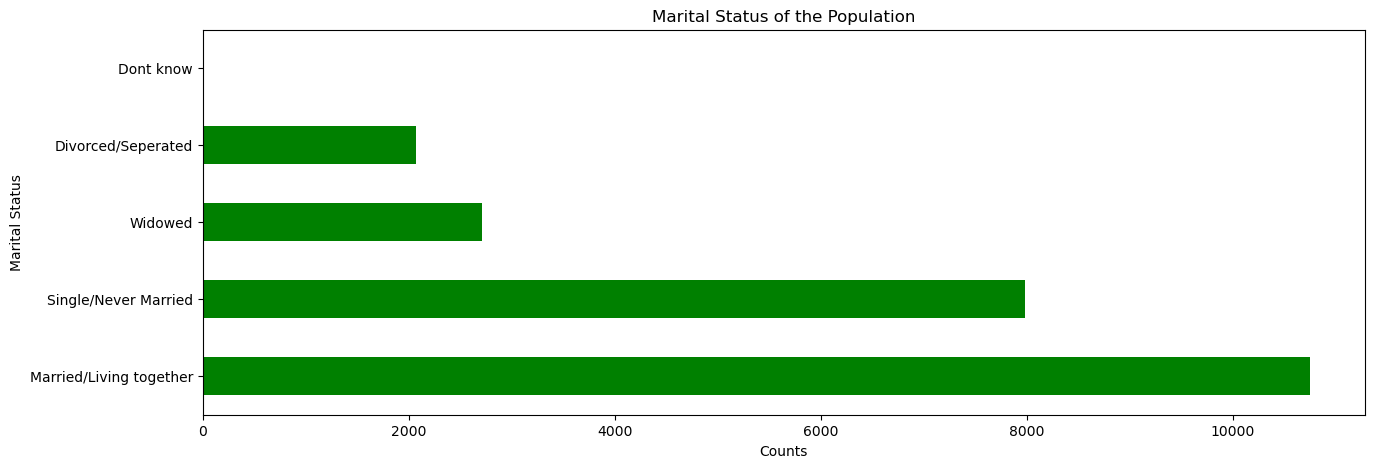

In [23]:
plt.figure(figsize= (15,5))
df.marital_status.value_counts().plot.barh(color = "green")
plt.ylabel("Marital Status")
plt.xlabel("Counts")
plt.title("Marital Status of the Population")

# The information from the marital_status column shows that eight persons marital status are unknown, this rows can be dropped

In [24]:
df.education_level.value_counts()

education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution Based on Education Level')

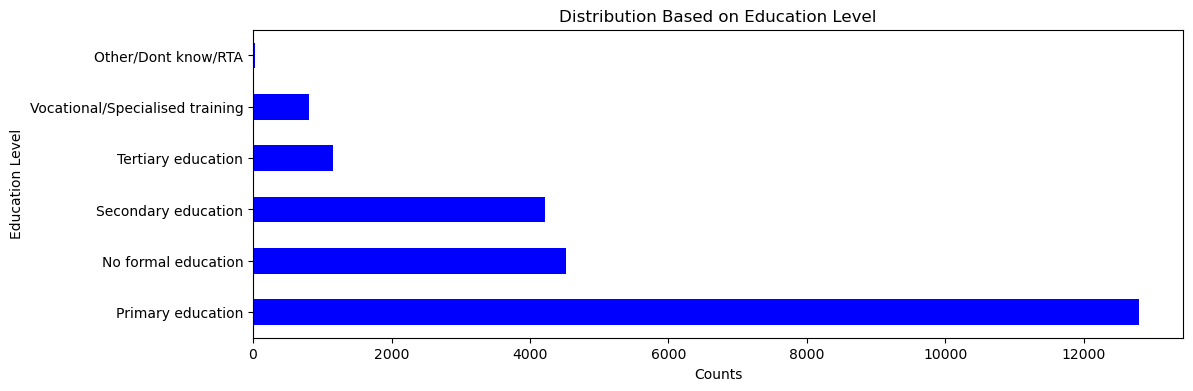

In [25]:
plt.figure(figsize= (12,4))
df.education_level.value_counts().plot.barh(color = "blue")
plt.ylabel("Education Level")
plt.xlabel("Counts")
plt.title("Distribution Based on Education Level")

In [26]:
df.job_type.value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

Text(0.5, 1.0, 'Job Distribution of the Population')

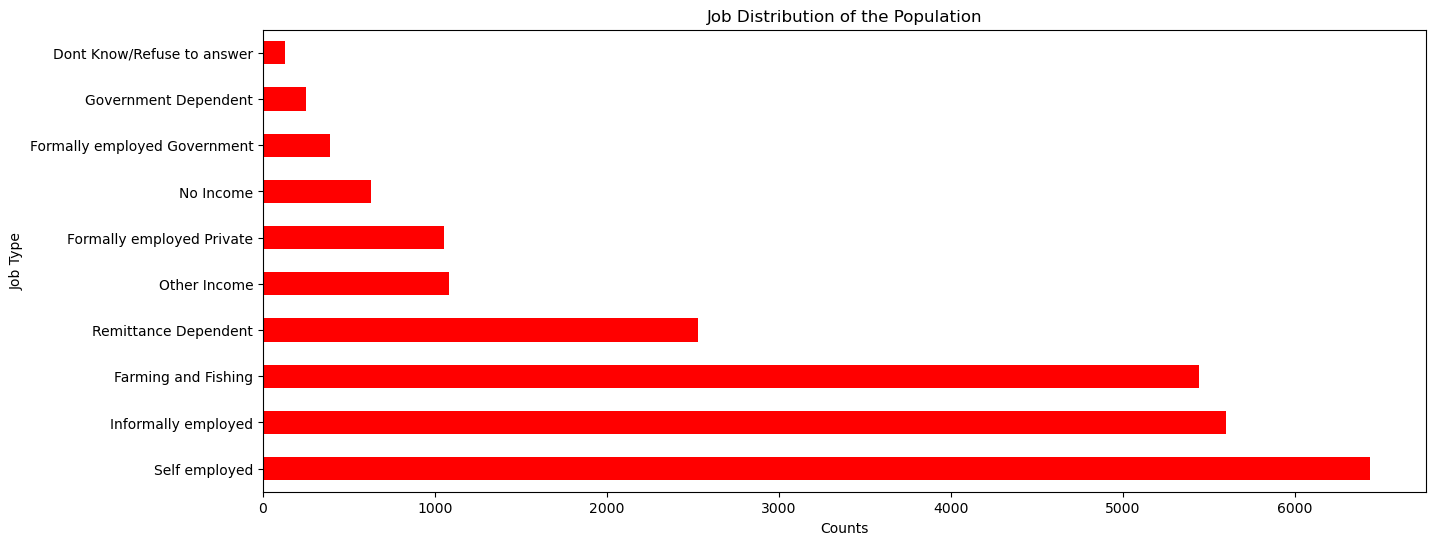

In [27]:
plt.figure(figsize= (15,6))
df.job_type.value_counts().plot.barh(color = "red")
plt.xlabel("Counts")
plt.ylabel("Job Type")
plt.title("Job Distribution of the Population")

Text(0.5, 1.0, 'Age Distribution')

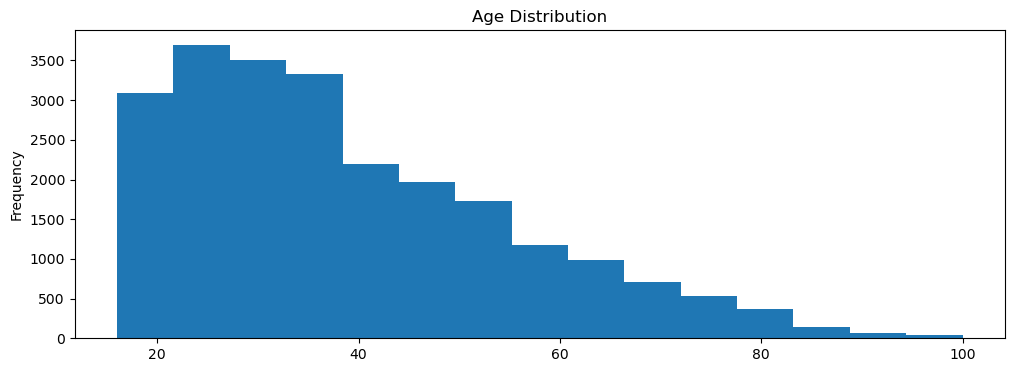

In [28]:
plt.figure(figsize= (12,4))
df.age_of_respondent.plot.hist(bins = 15)

plt.title("Age Distribution")

# Exploring the Relationship Between columns

In [29]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [30]:
df.head(2)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent


### The uniqueid column is functions as the index but starts from counting from index 1 so it will be dropped

In [31]:
df.drop("uniqueid", axis=1, inplace=True)

In [32]:
df.head(1)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed


# Encoding the categorical columns using LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()

label_encoder = LabelEncoder()

categorical_columns = ['country','bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level',
       'job_type']

for column in categorical_columns:
    df2[column + '_Encoded']= label_encoder.fit_transform(df2[column])

df2.drop(categorical_columns, axis=1, inplace=True)

In [34]:
df2.head(3)

,year,household_size,age_of_respondent,country_Encoded,bank_account_Encoded,location_type_Encoded,cellphone_access_Encoded,gender_of_respondent_Encoded,relationship_with_head_Encoded,marital_status_Encoded,education_level_Encoded,job_type_Encoded
0,2018,3,24,0,1,0,1,0,5,2,3,9
1,2018,5,70,0,0,0,0,0,1,4,0,4
2,2018,5,26,0,1,1,1,1,3,3,5,9


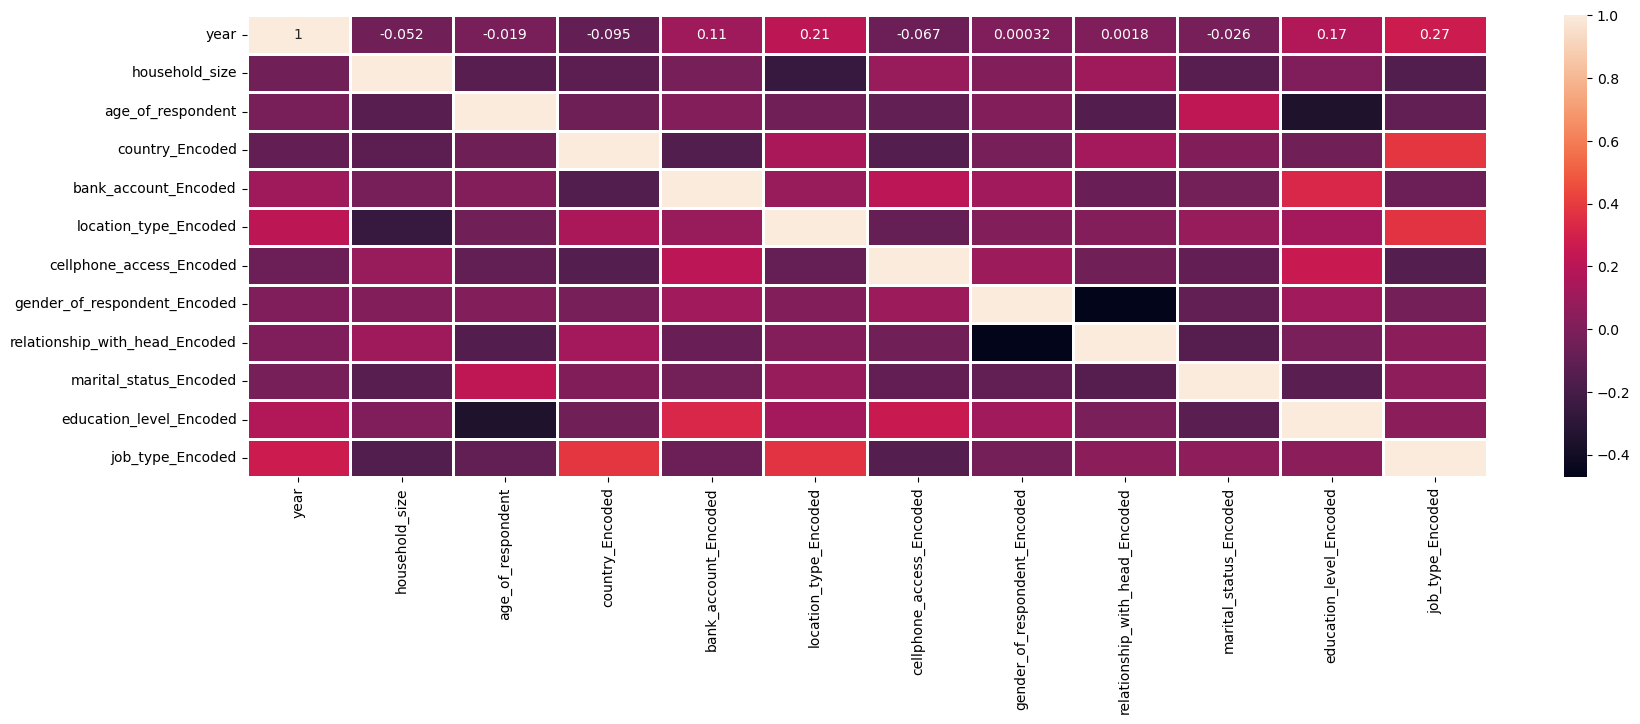

In [35]:
# correlation between the columns

plt.figure(figsize=(20, 6))
sns.heatmap(df2.corr(), annot=True, linewidths=1)
plt.show()

### From the correlation plot above, it can be seen that there is correlation of about 50 percent between the education level and the the bank account column

In [36]:
# split the data into two , those with bank account and those without bank accounts

df_true = df2[df2["bank_account_Encoded"] == 1]   # set with bank account
df_false = df2[df2["bank_account_Encoded"] == 0]   # set without bank account

In [37]:
# Get the percentage of the population with bank accounts

percentage_with_bank_account = len(df_true) / len(df)  * 100
print(f"Percentage of the Population with bank accounts: {percentage_with_bank_account:.2f}%")

Percentage of the Population with bank accounts: 14.08%


In [38]:
df_false.head()

,year,household_size,age_of_respondent,country_Encoded,bank_account_Encoded,location_type_Encoded,cellphone_access_Encoded,gender_of_respondent_Encoded,relationship_with_head_Encoded,marital_status_Encoded,education_level_Encoded,job_type_Encoded
1,2018,5,70,0,0,0,0,0,1,4,0,4
3,2018,5,34,0,0,0,1,0,1,2,2,3
4,2018,8,26,0,0,1,0,1,0,3,2,5
5,2018,7,26,0,0,0,0,0,5,2,2,5
6,2018,7,32,0,0,0,1,0,5,2,2,9


In [39]:
df_true.head()

,year,household_size,age_of_respondent,country_Encoded,bank_account_Encoded,location_type_Encoded,cellphone_access_Encoded,gender_of_respondent_Encoded,relationship_with_head_Encoded,marital_status_Encoded,education_level_Encoded,job_type_Encoded
0,2018,3,24,0,1,0,1,0,5,2,3,9
2,2018,5,26,0,1,1,1,1,3,3,5,9
8,2018,3,54,0,1,0,1,1,1,2,3,1
11,2018,3,69,0,1,0,1,1,1,2,3,7
17,2018,6,27,0,1,0,1,0,1,2,3,9


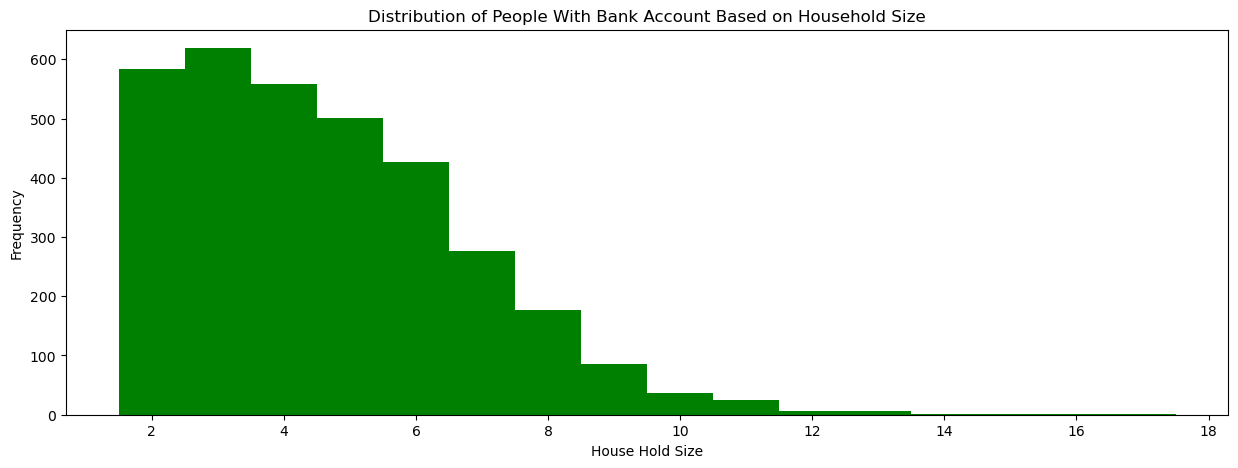

In [40]:
# distribution of people with bank account based on household size

plt.figure(figsize=(15,5))

plt.hist(df_true.household_size, bins=16, align="right", color="green")
plt.xlabel("House Hold Size")
plt.ylabel("Frequency")
plt.title("Distribution of People With Bank Account Based on Household Size")
plt.show()

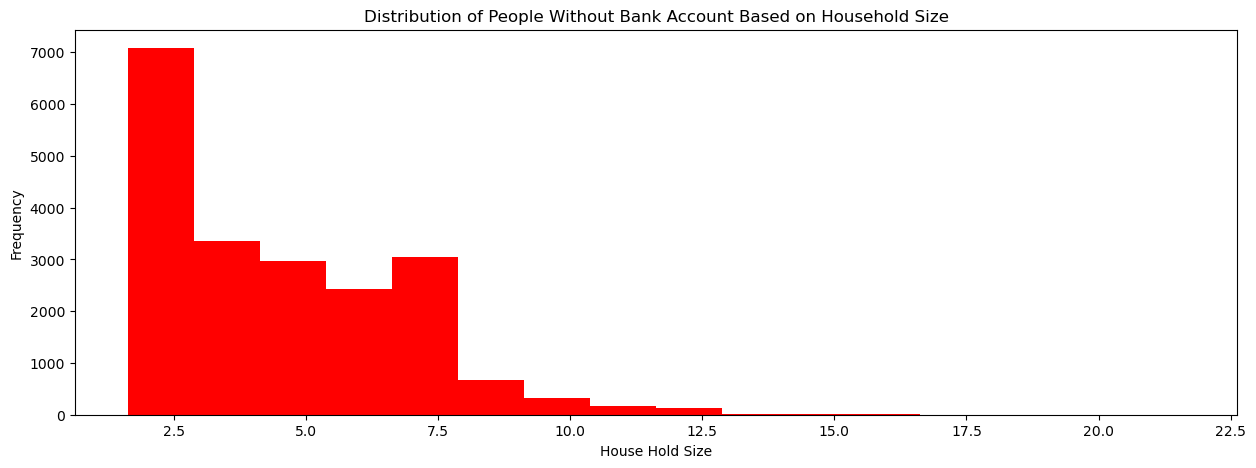

In [41]:
# distribution of people with bank account based on household size

plt.figure(figsize=(15,5))

plt.hist(df_false.household_size, bins=16, align="right", color="red")
plt.xlabel("House Hold Size")
plt.ylabel("Frequency")
plt.title("Distribution of People Without Bank Account Based on Household Size")
plt.show()

# From the above plots it can be seen that the population with the highest frequency of having a bank account are those with household size of 3, while those with house hold size of 2 are having higher chance of not having a bank account. From this, it can be seen that household size does not determine if a person will have a bank account

## Comparison based on country

In [42]:
df2.country_Encoded.unique(), df.country.unique()

(array([0, 1, 2, 3]),
 array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object))

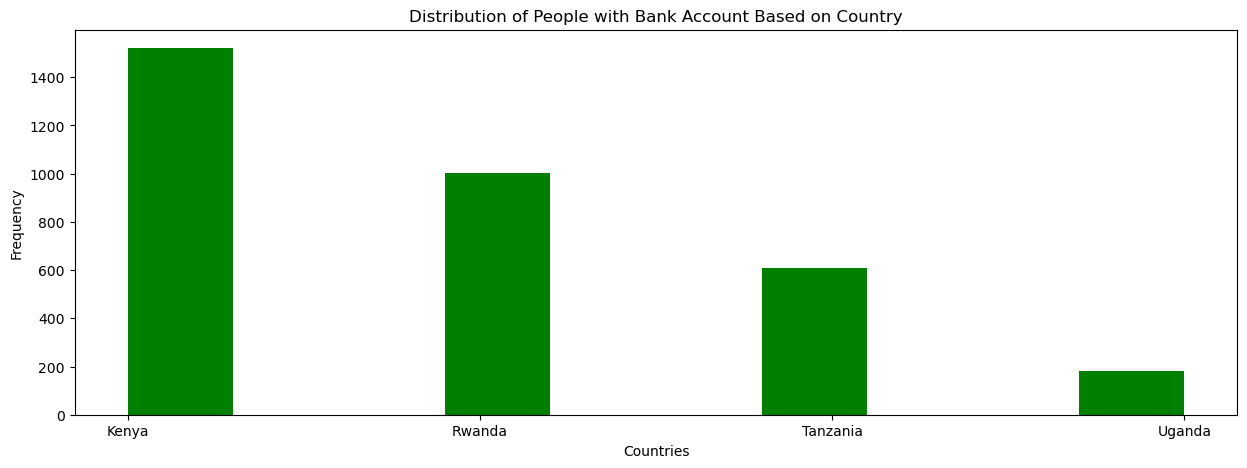

In [43]:

plt.figure(figsize=(15,5))

plt.hist(df_true.country_Encoded, color="green")
plt.xlabel("Countries")
plt.ylabel("Frequency")
plt.xticks(np.arange(4), ["Kenya", "Rwanda", "Tanzania", "Uganda"])
plt.title("Distribution of People with Bank Account Based on Country")
plt.show()

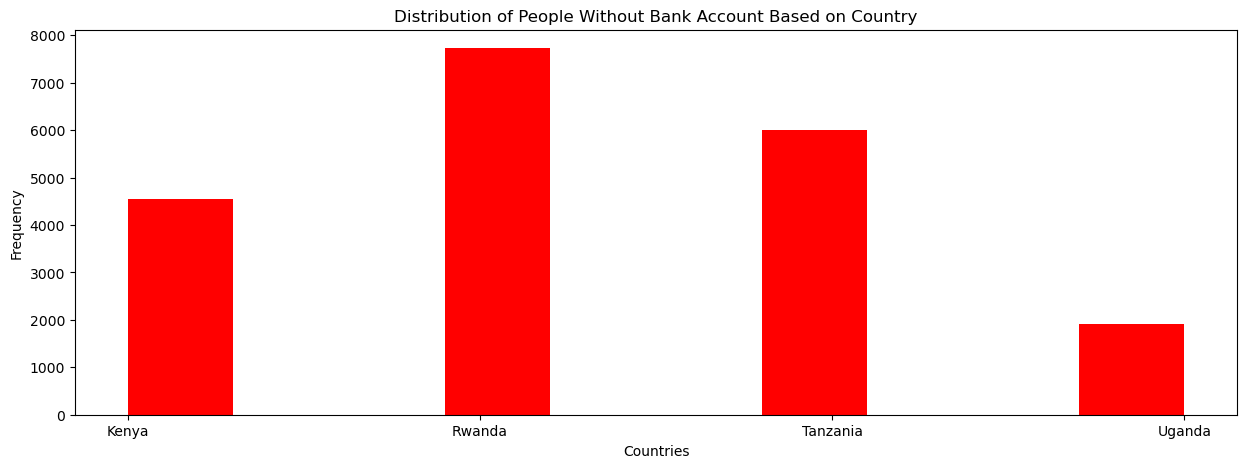

In [44]:

plt.figure(figsize=(15,5))

plt.hist(df_false.country_Encoded, color="red")
plt.xlabel("Countries")
plt.ylabel("Frequency")
plt.xticks(np.arange(4), ["Kenya", "Rwanda", "Tanzania", "Uganda"])
plt.title("Distribution of People Without Bank Account Based on Country")
plt.show()

# Kenya have the highest population with bank account while Rwanda have the highest population without bank account

# Comparison based on location type

In [45]:
df.location_type.unique(), df2.location_type_Encoded.unique()

(array(['Rural', 'Urban'], dtype=object), array([0, 1]))

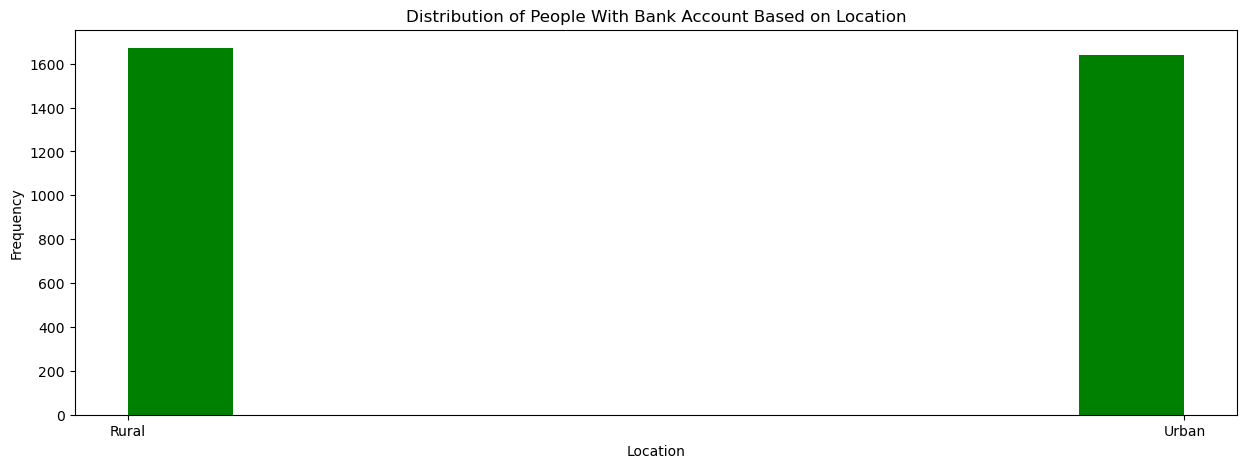

In [46]:

plt.figure(figsize=(15,5))

plt.hist(df_true.location_type_Encoded, color="green")
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.xticks(np.arange(2), ['Rural', 'Urban'])
plt.title("Distribution of People With Bank Account Based on Location")
plt.show()

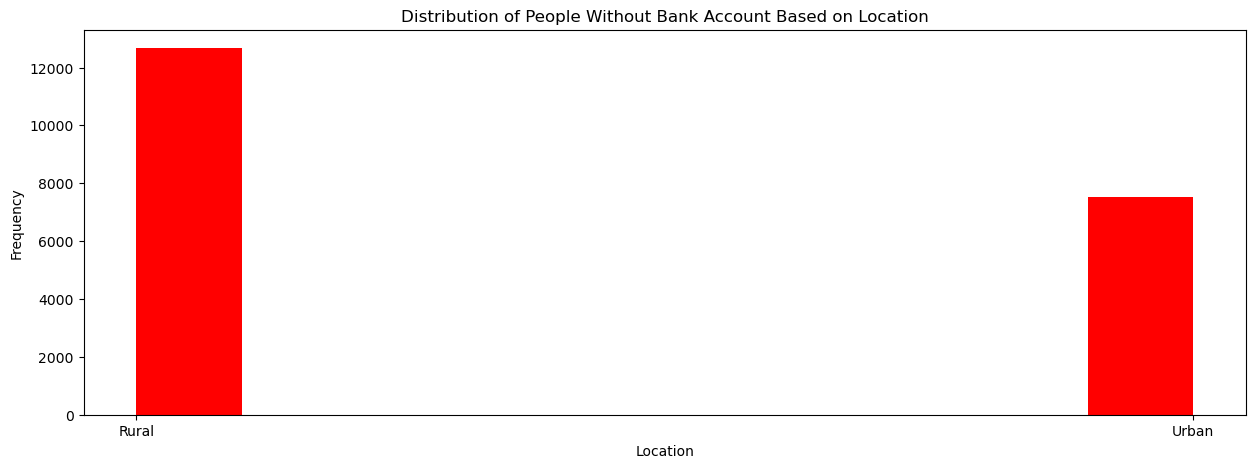

In [47]:
plt.figure(figsize=(15,5))

plt.hist(df_false.location_type_Encoded, color="red")
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.xticks(np.arange(2), ['Rural', 'Urban'])
plt.title("Distribution of People Without Bank Account Based on Location")
plt.show()

# From the first plot the distribution based on location are almost equal while in the second plot, the rural population are greater than that of the urban who do not have a bank account

# Comparison based on cell phone access

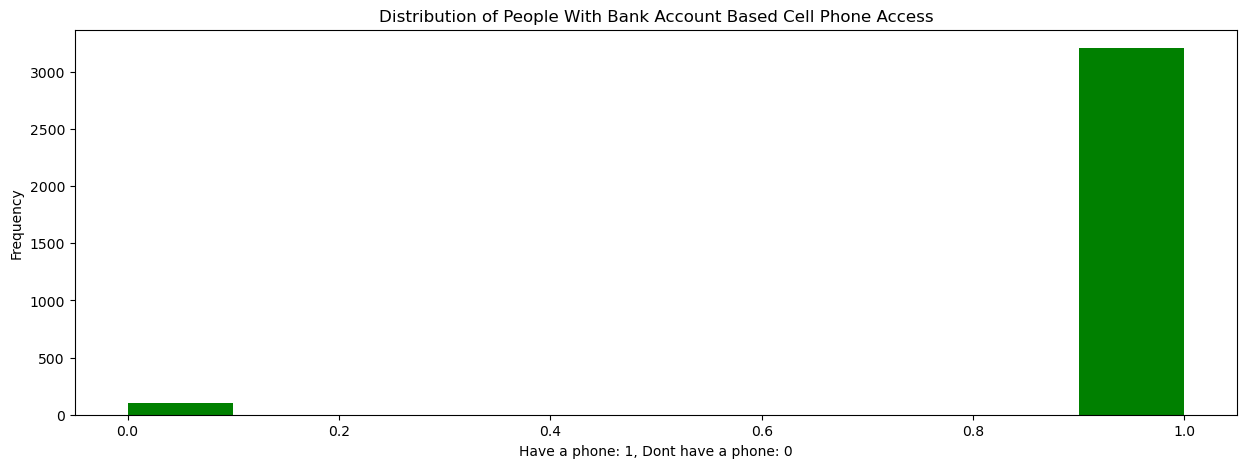

In [48]:
plt.figure(figsize=(15,5))

plt.hist(df_true.cellphone_access_Encoded, color="green")
plt.xlabel("Have a phone: 1, Dont have a phone: 0")
plt.ylabel("Frequency")
plt.title("Distribution of People With Bank Account Based Cell Phone Access")
plt.show()

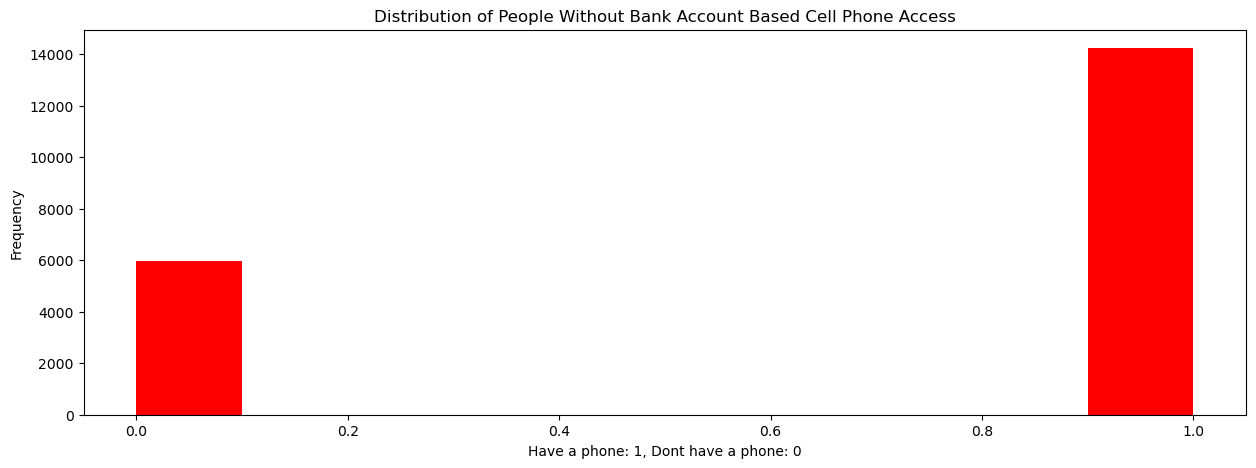

In [49]:
plt.figure(figsize=(15,5))

plt.hist(df_false.cellphone_access_Encoded, color="red")
plt.xlabel("Have a phone: 1, Dont have a phone: 0")
plt.ylabel("Frequency")
plt.title("Distribution of People Without Bank Account Based Cell Phone Access")
plt.show()

# Phone is one of the criteria that is needed for creating a bank account so the population with bank account and who owns a cellphone are more than those who have an account but do not have a phone

# Comparison based on relationship with head

In [50]:
df.relationship_with_head.unique(), df2.relationship_with_head_Encoded.unique()

(array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
        'Other non-relatives'], dtype=object),
 array([5, 1, 3, 0, 4, 2]))

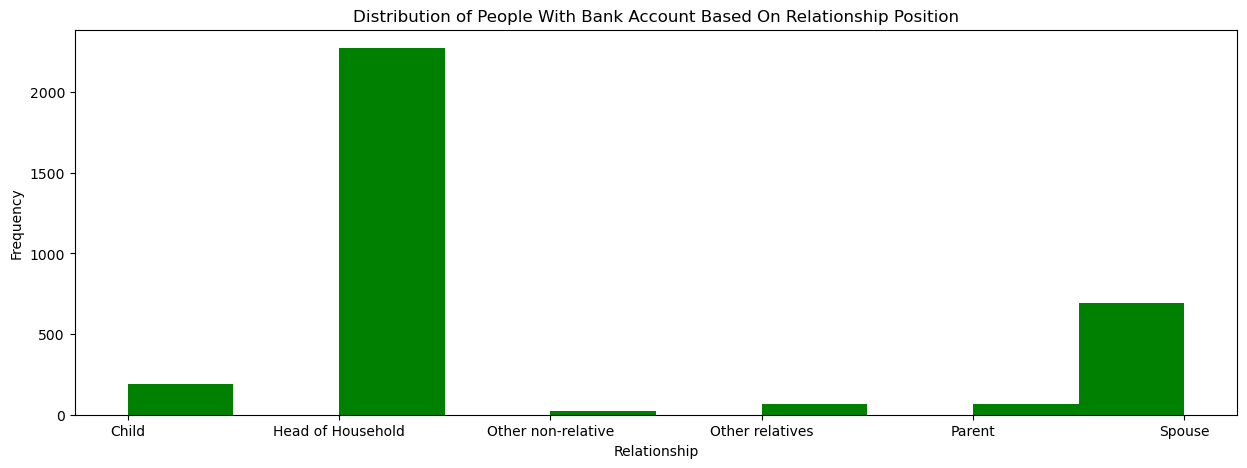

In [51]:
plt.figure(figsize=(15,5))

plt.hist(df_true.relationship_with_head_Encoded, color="green")
plt.xlabel("Relationship")
plt.ylabel("Frequency")
plt.xticks(np.arange(6),['Child', 'Head of Household', 'Other non-relative', 'Other relatives', 'Parent',
        'Spouse'] )
plt.title("Distribution of People With Bank Account Based On Relationship Position")
plt.show()

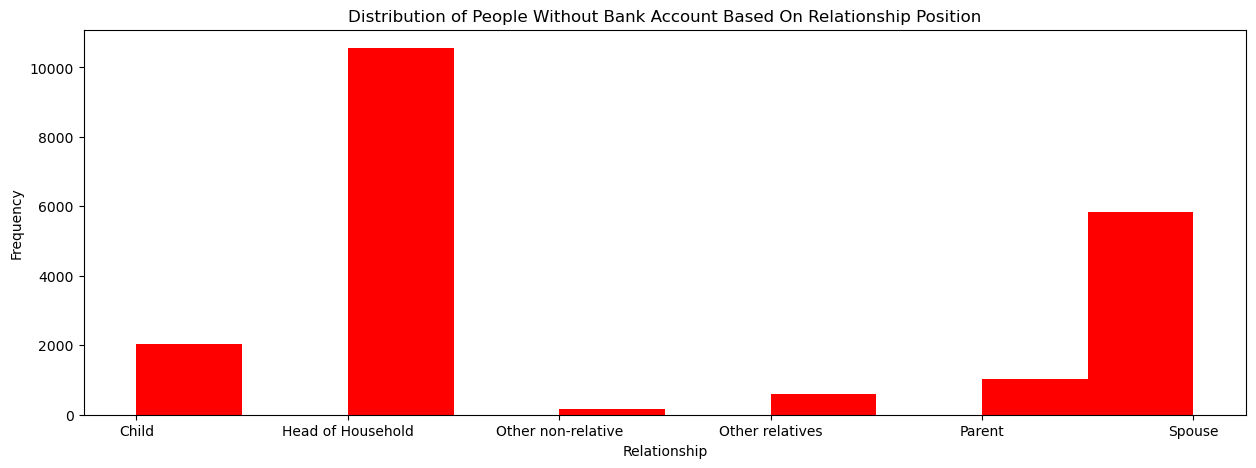

In [52]:
plt.figure(figsize=(15,5))

plt.hist(df_false.relationship_with_head_Encoded, color="red")
plt.xlabel("Relationship")
plt.ylabel("Frequency")
plt.xticks(np.arange(6),['Child', 'Head of Household', 'Other non-relative', 'Other relatives', 'Parent',
        'Spouse'] )
plt.title("Distribution of People Without Bank Account Based On Relationship Position")
plt.show()

# Comparison Based on marital status

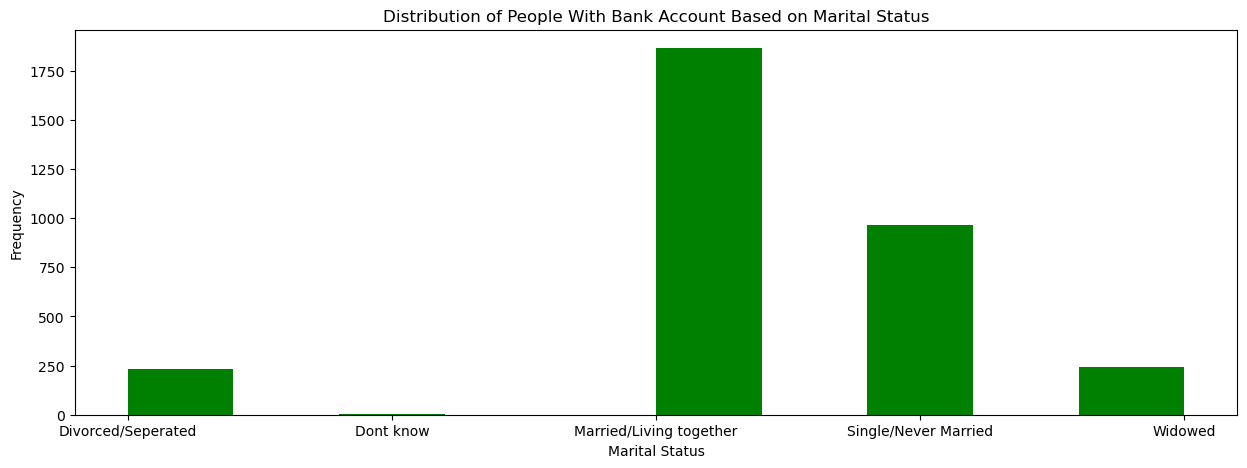

In [53]:
plt.figure(figsize=(15,5))

plt.hist(df_true.marital_status_Encoded, color="green")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.xticks(np.arange(5), ['Divorced/Seperated','Dont know', 'Married/Living together', 'Single/Never Married', 'Widowed' ])
plt.title("Distribution of People With Bank Account Based on Marital Status")
plt.show()

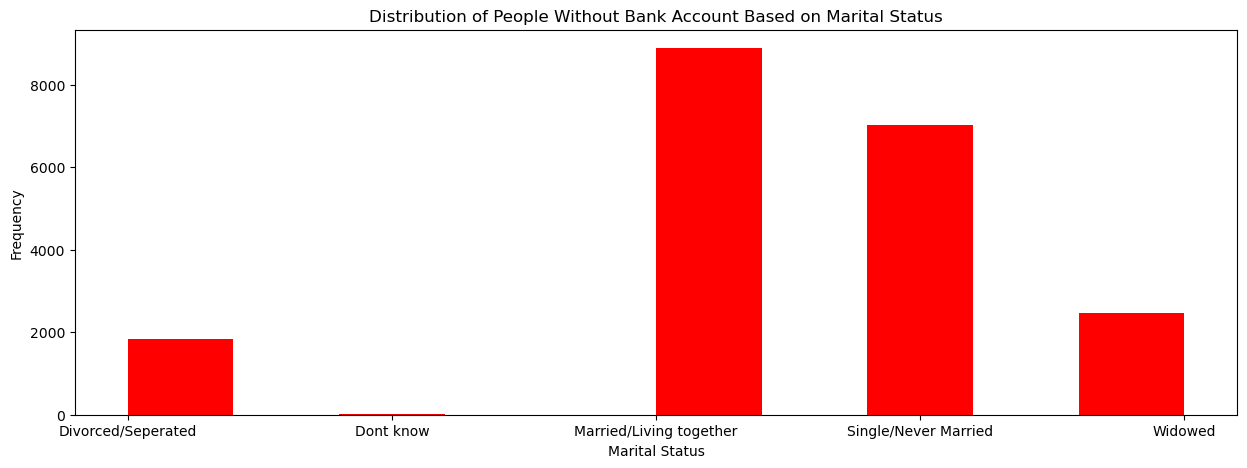

In [54]:
plt.figure(figsize=(15,5))

plt.hist(df_false.marital_status_Encoded, color="red")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.xticks(np.arange(5), ['Divorced/Seperated','Dont know', 'Married/Living together', 'Single/Never Married', 'Widowed' ])
plt.title("Distribution of People Without Bank Account Based on Marital Status")
plt.show()

# Comparison based on education level

In [55]:
df.education_level.unique(), df2.education_level_Encoded.unique()

(array(['Secondary education', 'No formal education',
        'Vocational/Specialised training', 'Primary education',
        'Tertiary education', 'Other/Dont know/RTA'], dtype=object),
 array([3, 0, 5, 2, 4, 1]))

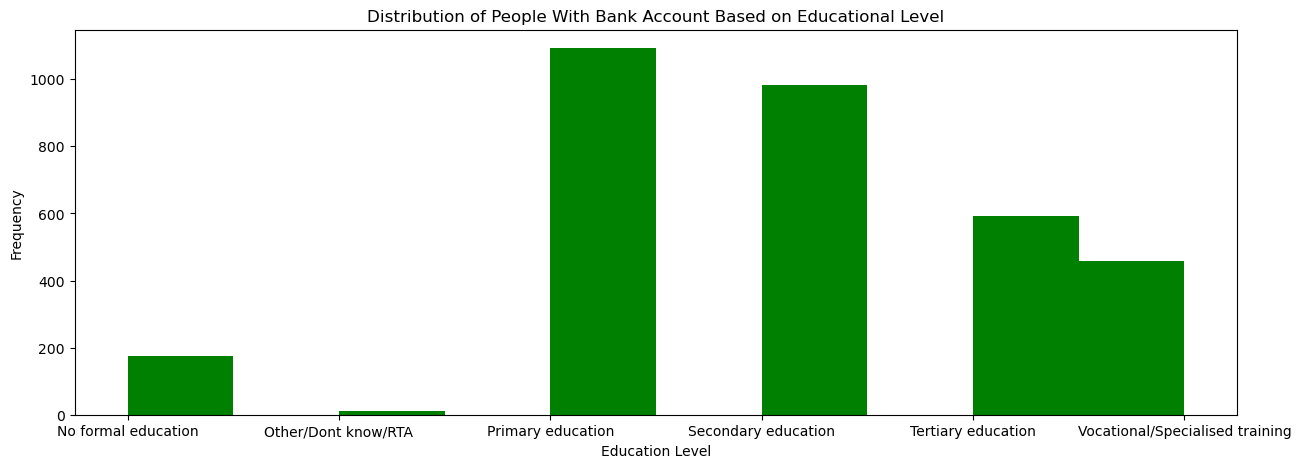

In [56]:
plt.figure(figsize=(15,5))

plt.hist(df_true.education_level_Encoded, color="green")
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.xticks(np.arange(6), ['No formal education', 'Other/Dont know/RTA', 'Primary education', 'Secondary education','Tertiary education', 'Vocational/Specialised training'])
plt.title("Distribution of People With Bank Account Based on Educational Level")
plt.show()

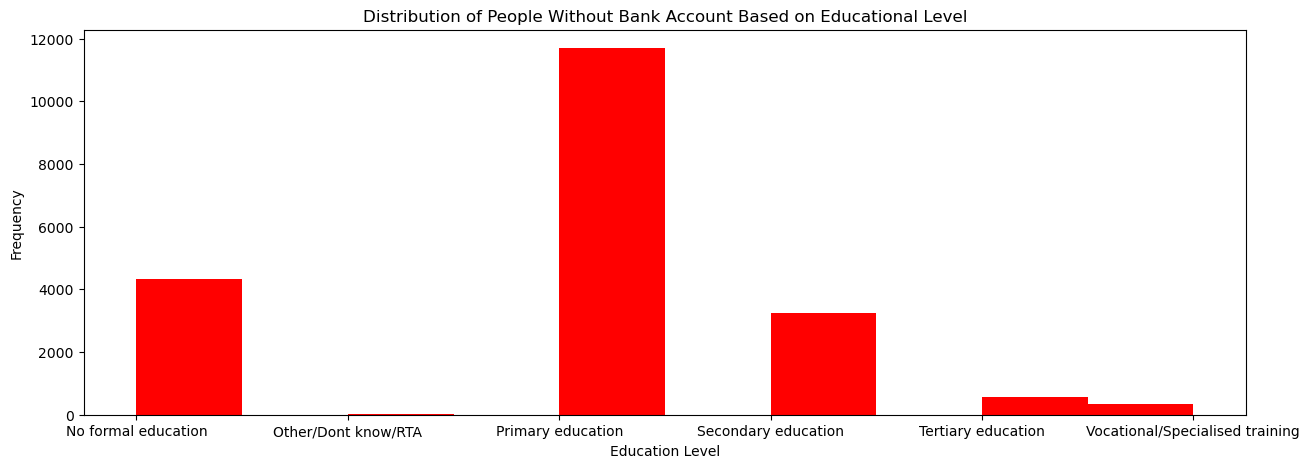

In [57]:
plt.figure(figsize=(15,5))

plt.hist(df_false.education_level_Encoded, color="red")
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.xticks(np.arange(6), ['No formal education', 'Other/Dont know/RTA', 'Primary education', 'Secondary education','Tertiary education', 'Vocational/Specialised training'])
plt.title("Distribution of People Without Bank Account Based on Educational Level")
plt.show()

# from the plot above it can be seen that people with tertiary education and others other than primary and secondary are likely to have other means of financial transactions such as, daily savings, or online banking platforms

# Comparison based on job type

In [58]:
df2.job_type_Encoded.unique(), df.job_type.unique()

(array([9, 4, 3, 5, 2, 1, 8, 7, 0, 6]),
 array(['Self employed', 'Government Dependent',
        'Formally employed Private', 'Informally employed',
        'Formally employed Government', 'Farming and Fishing',
        'Remittance Dependent', 'Other Income',
        'Dont Know/Refuse to answer', 'No Income'], dtype=object))

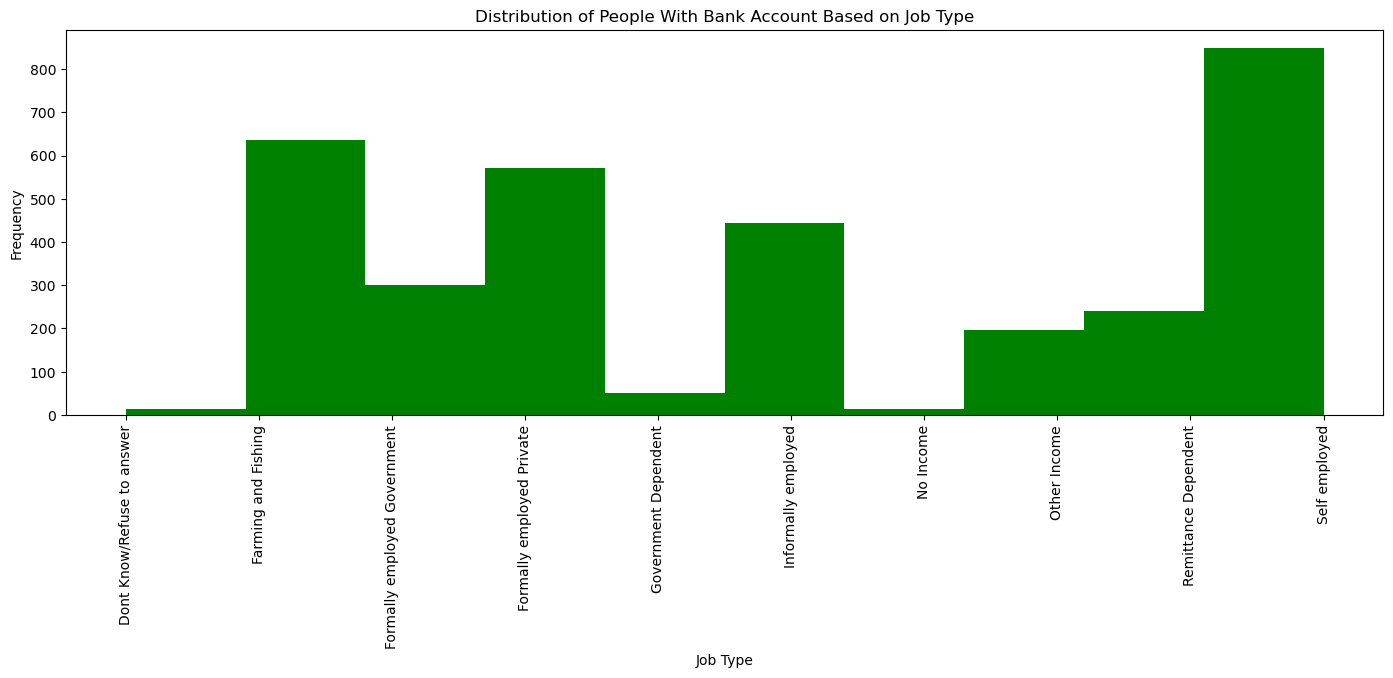

In [59]:
plt.figure(figsize=(17,5))

plt.hist(df_true.job_type_Encoded, color="green")
plt.xlabel("Job Type")
plt.ylabel("Frequency")
plt.xticks(np.arange(10), ['Dont Know/Refuse to answer', 'Farming and Fishing', 'Formally employed Government', 'Formally employed Private', 'Government Dependent', 'Informally employed',  'No Income', 'Other Income', 'Remittance Dependent', 'Self employed'], rotation=90)
plt.title("Distribution of People With Bank Account Based on Job Type")
plt.show()

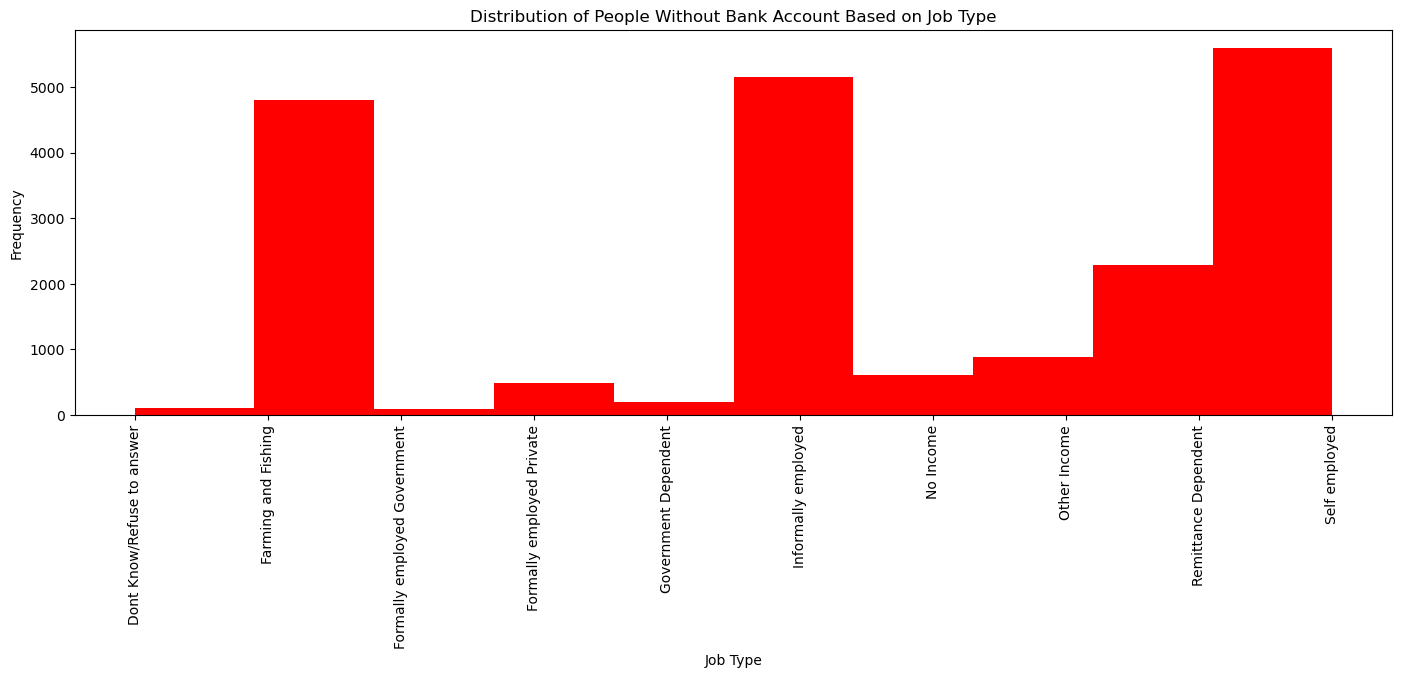

In [60]:
plt.figure(figsize=(17,5))

plt.hist(df_false.job_type_Encoded, color="red")
plt.xlabel("Job Type")
plt.ylabel("Frequency")
plt.xticks(np.arange(10), ['Dont Know/Refuse to answer', 'Farming and Fishing', 'Formally employed Government', 'Formally employed Private', 'Government Dependent', 'Informally employed',  'No Income', 'Other Income', 'Remittance Dependent', 'Self employed'], rotation=90)
plt.title("Distribution of People Without Bank Account Based on Job Type")
plt.show()

# From the exploration above, it can be seen that just 14.08 %  of the population have a bank account. This is due to certain factors such as those plotted above

#    PREPROCESSING

## Outliers Removal

In [61]:
df.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

Text(0.5, 1.0, 'Boxplots For The Age and Household size')

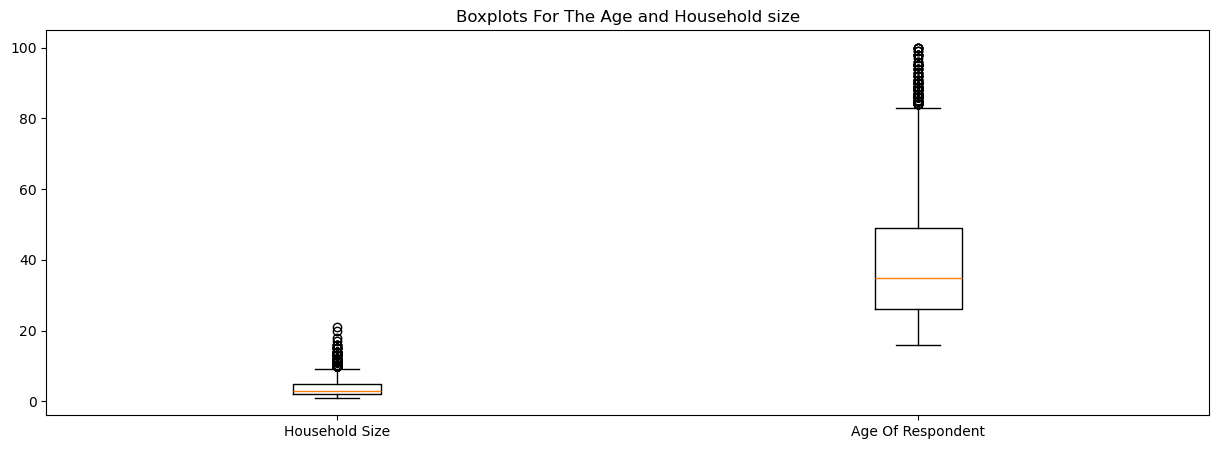

In [62]:
# create a boxplot for the columns with continous entries

plt.figure(figsize=(15,5))
plt.boxplot([df.household_size, df.age_of_respondent], labels=["Household Size", "Age Of Respondent"])
plt.title("Boxplots For The Age and Household size")


### From the plot above it can be seen that the "household_size" and the "age_of_respondent" columns contains outliers

In [63]:
# function for replacing the outliers with the mode

def replace_outliers_with_mode(data, column):
    # Calculate Q1, Q3 and IQR
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1

    # Calculate lower and upper bound
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Calculate the percent outliers
    percentage_outliers = len(data[data[column] > upper_bound]) / len(data) * 100
    
    print(f"Percentage Outlier: {percentage_outliers:.2f}%")
    print(f"First Quatile: {Q1}")
    print(f"Third Quatile: {Q3}")
    print(f"Interquatile Range: {IQR}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Lower Bound: {lower_bound}")

    # find mode of data
    mode = data[column].mode()[0];

    # replace outliers with mode
    return  data[column].apply(lambda x: mode if (x < lower_bound or x > upper_bound) else x)

# Apply the function to the "age_of_respondent" and "household_size" column
df["age_of_respondent"] = replace_outliers_with_mode(df, "age_of_respondent")
print("")
df["household_size"] = replace_outliers_with_mode(df, "household_size")

Percentage Outlier: 1.02%
First Quatile: 26.0
Third Quatile: 49.0
Interquatile Range: 23.0
Upper Bound: 83.5
Lower Bound: -8.5

Percentage Outlier: 1.62%
First Quatile: 2.0
Third Quatile: 5.0
Interquatile Range: 3.0
Upper Bound: 9.5
Lower Bound: -2.5


# Encoding the data for model building

In [64]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop=None) 

# Columns to be transformed
categorical_cols = ["country", "relationship_with_head", "marital_status", "education_level", "job_type"]

encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

new_df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1) # The new_df will be used to train the model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [65]:
cat_cols = ["bank_account", "location_type", "cellphone_access", "gender_of_respondent"]

for column in cat_cols:
    new_df[column]= label_encoder.fit_transform(new_df[column])


In [66]:
new_df.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,1,0,1,3,24,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2018,0,0,0,5,70,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2018,1,1,1,5,26,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2018,0,0,1,5,34,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,0,1,0,8,26,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [67]:
new_df.columns

Index(['year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'country_Kenya', 'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to ans

# Splitting the Data

In [68]:
from sklearn.model_selection import train_test_split

x = new_df.drop("bank_account", axis=1)
y = new_df["bank_account"]

# split the data into train and test set with a test size of 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

# Fitting the Data

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# tuning the hyperparameters
grid = {"n_estimators": [10,100,200,500,1000,1200],
       "max_depth": [None, 5, 10, 20, 30, 40],
       "max_features": ["auto", "sqrt"],
       "min_samples_split":[2,4,6,8,10],
       "min_samples_leaf": [1, 2, 4,6,8]}

np.random.seed(42)

clf = RandomForestClassifier()


model = RandomizedSearchCV(estimator= clf, param_distributions= grid, n_iter = 20, cv = 10)

model.fit(x_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]})

In [70]:
# get the best parameters
model.best_params_  

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': None}

In [71]:
y_preds = model.predict(x_test)

# Evaluation

In [72]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.1156134882402947

# The percentage of the population who have a bank account is small compared to the total population. This is not a good one especially for developing countries in Africa. In order to curb this challenge,
# . Proper orientation should be given to the population on the need to have a bank account as it fosters economic growth.
# . Also the criteria placed by certain banks should be one that can be met by everyone